<a href="https://colab.research.google.com/github/Atlat-F4/Final_Report/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Helpful Links -> https://pypi.org/project/wbgapi/ | https://data.worldbank.org/indicator/SP.POP.GROW?view=chart
# Repository -> 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install wbgapi
import wbgapi as wb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read in the data. There isn't a csv link for Worldbank's databases, so I'm using custom imports that exist for their data.

In [ ]:
df = wb.data.DataFrame('SP.POP.GROW', labels=True)
print(df.head())

                       Country  YR1960    YR1961    YR1962     YR1963  \
economy                                                                 
ZWE                   Zimbabwe     NaN  3.094865  3.105320   3.115408   
ZMB                     Zambia     NaN  3.156056  3.178563   3.196632   
YEM                Yemen, Rep.     NaN  1.862737  1.872291   1.839467   
PSE         West Bank and Gaza     NaN       NaN       NaN        NaN   
VIR      Virgin Islands (U.S.)     NaN  5.390526  2.020271  12.851885   

           YR1964    YR1965    YR1966    YR1967     YR1968  ...    YR2012  \
economy                                                     ...             
ZWE      3.119878  3.124829  3.129628  3.135761   3.152789  ...  1.822309   
ZMB      3.194441  3.201590  3.218695  3.219669   3.225439  ...  3.301480   
YEM      1.920052  2.046198  2.127857  2.216335   2.295831  ...  2.893027   
PSE           NaN       NaN       NaN       NaN        NaN  ...  2.467687   
VIR      2.481517  6.40788

The first part of this assignment is to find out some basic data about the assignment that'll help fill myself in in regards to how the data works.


Find the annual percentage change of population growth in 2016.

In [ ]:
df['YR2016']

economy
ZWE    2.081806
ZMB    3.147407
YEM    2.621537
PSE    2.246105
VIR   -0.182132
         ...   
CEB   -0.255291
CSS    0.562938
ARB    2.109697
AFW    2.713059
AFE    2.728160
Name: YR2016, Length: 266, dtype: float64

Which year did India experience its greatest population growth?

In [ ]:
df.loc[:, ~df.columns.isin(['Country'])].loc['IND'].dropna().idxmax()

'YR1962'

Which country experienced the heaviest loss in 1985?

In [ ]:
df.loc[df.loc[:, ~df.columns.isin(['Country'])]['YR1985'].dropna(axis=0).idxmin()]['Country']

'St. Kitts and Nevis'

Create two new columns called 'Average Growth' and 'Total Growth' that'll determine the average/total growth from 1961 to 2021.

In [ ]:
dfNoNan = df.loc[:, ~df.columns.isin(['Country'])].fillna(0)
df['Average Growth'] = dfNoNan.mean(axis=1)
df['Total Growth'] = dfNoNan.sum(axis=1)
df = df.sort_values('economy')

Merge region and income level into the data frame.

In [ ]:
print(wb.economy.info())
diction = vars(wb.economy.info())
diction = pd.DataFrame(diction.get('items'))
diction = diction.loc[:,diction.columns.isin(['id','value','region','incomeLevel'])]
diction = diction.rename(columns={'id' : 'economy', 'value' : 'Country', 'region' : 'Region', 'incomeLevel' : 'Income Level'})
diction = diction.set_index('economy')
df = df.merge(diction,how='inner')
df = df.replace(r'^\s+$', np.nan, regex=True)
df.head()

id    value                                                 region    incomeLevel
----  ----------------------------------------------------  --------  -------------
ABW   Aruba                                                 LCN       HIC
AFE   Africa Eastern and Southern
AFG   Afghanistan                                           SAS       LIC
AFW   Africa Western and Central
AGO   Angola                                                SSF       LMC
ALB   Albania                                               ECS       UMC
AND   Andorra                                               ECS       HIC
ARB   Arab World
ARE   United Arab Emirates                                  MEA       HIC
ARG   Argentina                                             LCN       UMC
ARM   Armenia                                               ECS       UMC
ASM   American Samoa                                        EAS       UMC
ATG   Antigua and Barbuda                                   LCN       HIC
AUS   Aust

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,Average Growth,Total Growth,Region,Income Level
0,Aruba,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,0.862184,0.388847,-0.085719,...,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,1.077923,66.831195,LCN,HIC
1,Africa Eastern and Southern,NaN,2.660180,2.732633,2.753248,2.806915,2.840787,2.813609,2.830505,2.881589,...,2.728160,2.655673,2.688373,2.691136,2.678185,2.607473,2.751552,170.596250,,
2,Afghanistan,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,2.253524,2.292638,2.347351,...,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358,2.479019,153.699180,SAS,LIC
3,Africa Western and Central,NaN,2.115789,2.145723,2.190827,2.211360,2.242567,2.272816,2.275721,2.295953,...,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377,2.602819,161.374750,,
4,Angola,NaN,1.558355,1.460738,1.410425,1.301745,1.111041,0.875806,0.696698,0.695985,...,3.586211,3.550987,3.464457,3.395278,3.268348,3.166030,3.004239,186.262819,SSF,LMC


The second part of this assignment revolves around finding the patterns and trends around a country's population growth per year compared to factors like the region in the world they are or the country's income. (Found in global values.)


Graph the growth of each country, seperated by income group.

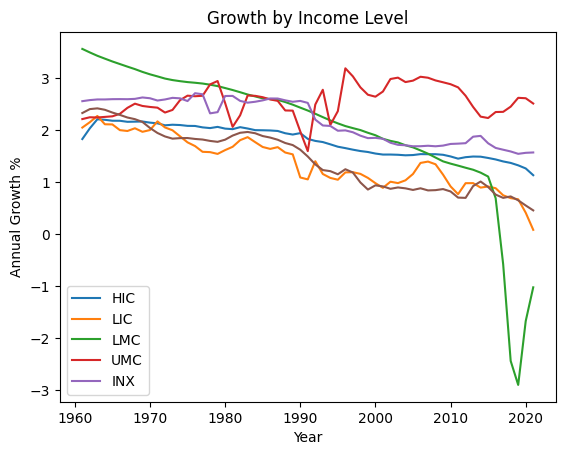

In [ ]:
years = np.arange(1961,2022)
region = df.groupby('Income Level').mean(numeric_only=True).dropna(axis=1).drop(['Average Growth','Total Growth'],axis=1)
region = region.swapaxes("index", "columns")
plt.plot(years,region)
plt.title("Growth by Income Level")
plt.xlabel("Year")
plt.ylabel("Annual Growth %")
plt.legend(np.delete(df['Income Level'].unique(),1))
plt.show()

Graph a similar setup as the last graph, but instead seperated by region.

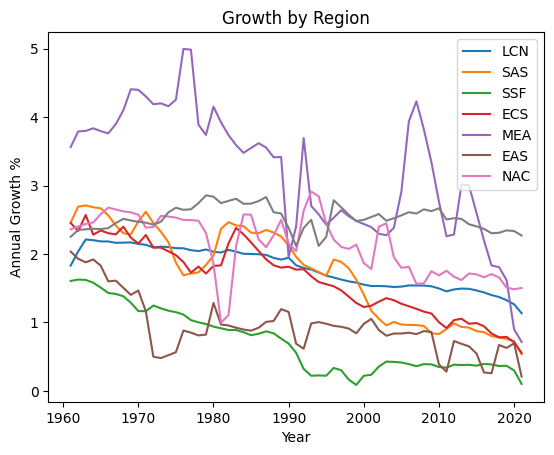

In [ ]:
region = df.groupby('Region').mean(numeric_only=True).dropna(axis=1).drop(['Average Growth','Total Growth'],axis=1)
region = region.swapaxes("index", "columns")
plt.plot(years,region)
plt.title("Growth by Region")
plt.xlabel("Year")
plt.ylabel("Annual Growth %")
plt.legend(np.delete(df['Region'].unique(),1))
plt.show()

Create two tables sorted from greatest growth to least growth. What patterns are noticed between these graphs and tables?

In [ ]:
df.sort_values('Average Growth')

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,Average Growth,Total Growth,Region,Income Level
125,St. Kitts and Nevis,NaN,-0.731579,-1.510091,-1.845309,-2.110700,-2.354033,-2.596081,-2.829547,-3.085539,...,-0.004185,-0.006278,-0.050238,-0.102647,-0.146821,-0.075592,-0.280822,-17.410969,LCN,HIC
21,Bulgaria,NaN,0.958156,0.875259,0.810378,0.816094,0.731911,0.654701,0.629747,0.711965,...,-0.701382,-0.730443,-0.722080,-0.703906,-0.600242,-0.814846,-0.216829,-13.443379,ECS,UMC
145,Latvia,NaN,1.483627,1.333809,1.335613,1.334569,1.122646,0.760500,0.785400,0.968647,...,-0.913885,-0.886216,-0.779138,-0.695239,-0.701212,-0.843295,-0.190678,-11.822055,ECS,HIC
99,Croatia,NaN,0.652692,0.703494,0.687765,0.641645,0.657318,0.693190,0.647031,0.619120,...,-0.698383,-1.200610,-0.893487,-0.554147,-0.433210,-3.742377,-0.096805,-6.001940,ECS,HIC
101,Hungary,NaN,0.453240,0.322661,0.260183,0.315601,0.277288,0.302245,0.372156,0.383062,...,-0.295111,-0.265861,-0.126787,-0.045256,-0.215068,-0.413751,-0.044896,-2.783545,ECS,HIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Jordan,NaN,5.049055,4.683897,4.599545,5.064691,6.033802,7.000869,7.624106,7.674857,...,4.835850,2.485009,2.365103,2.257510,2.127363,1.989077,4.155218,257.623516,MEA,UMC
127,Kuwait,NaN,10.638254,10.734267,10.603350,10.221450,9.826722,9.573293,9.407584,9.201340,...,3.502809,1.879882,4.556082,2.829852,-1.832821,-2.562808,4.246822,263.302958,MEA,HIC
225,Sint Maarten (Dutch part),NaN,8.751516,9.348277,9.327261,9.057201,8.786381,8.518724,8.439632,8.250496,...,2.903978,1.502331,0.788034,1.728465,1.673101,1.258883,4.491231,278.456323,LCN,HIC
8,United Arab Emirates,NaN,5.509939,5.447405,5.316356,5.150823,5.009570,4.891154,4.758689,10.963446,...,0.863869,0.819744,0.789450,0.779087,0.817694,0.834813,6.856779,425.120308,MEA,HIC


In [ ]:
df.sort_values('Total Growth')

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,Average Growth,Total Growth,Region,Income Level
125,St. Kitts and Nevis,NaN,-0.731579,-1.510091,-1.845309,-2.110700,-2.354033,-2.596081,-2.829547,-3.085539,...,-0.004185,-0.006278,-0.050238,-0.102647,-0.146821,-0.075592,-0.280822,-17.410969,LCN,HIC
21,Bulgaria,NaN,0.958156,0.875259,0.810378,0.816094,0.731911,0.654701,0.629747,0.711965,...,-0.701382,-0.730443,-0.722080,-0.703906,-0.600242,-0.814846,-0.216829,-13.443379,ECS,UMC
145,Latvia,NaN,1.483627,1.333809,1.335613,1.334569,1.122646,0.760500,0.785400,0.968647,...,-0.913885,-0.886216,-0.779138,-0.695239,-0.701212,-0.843295,-0.190678,-11.822055,ECS,HIC
99,Croatia,NaN,0.652692,0.703494,0.687765,0.641645,0.657318,0.693190,0.647031,0.619120,...,-0.698383,-1.200610,-0.893487,-0.554147,-0.433210,-3.742377,-0.096805,-6.001940,ECS,HIC
101,Hungary,NaN,0.453240,0.322661,0.260183,0.315601,0.277288,0.302245,0.372156,0.383062,...,-0.295111,-0.265861,-0.126787,-0.045256,-0.215068,-0.413751,-0.044896,-2.783545,ECS,HIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Jordan,NaN,5.049055,4.683897,4.599545,5.064691,6.033802,7.000869,7.624106,7.674857,...,4.835850,2.485009,2.365103,2.257510,2.127363,1.989077,4.155218,257.623516,MEA,UMC
127,Kuwait,NaN,10.638254,10.734267,10.603350,10.221450,9.826722,9.573293,9.407584,9.201340,...,3.502809,1.879882,4.556082,2.829852,-1.832821,-2.562808,4.246822,263.302958,MEA,HIC
225,Sint Maarten (Dutch part),NaN,8.751516,9.348277,9.327261,9.057201,8.786381,8.518724,8.439632,8.250496,...,2.903978,1.502331,0.788034,1.728465,1.673101,1.258883,4.491231,278.456323,LCN,HIC
8,United Arab Emirates,NaN,5.509939,5.447405,5.316356,5.150823,5.009570,4.891154,4.758689,10.963446,...,0.863869,0.819744,0.789450,0.779087,0.817694,0.834813,6.856779,425.120308,MEA,HIC


First, there's an exception. Venezuela falls under IMX in the income group, so it should be removed from any pattern finding. As for anything noticeable like patterns in the income groups, there is the fact that all though every group barring the Upper Middle Income Coutries are on a decline, the Lower Middle Income Countries had a massive fall in the mid 2010s as more people left the country than came in. Perhaps this means that these countries are more succeptible to unexpected events or changes than other countries? High Income Countries and Upper Middle Countries are probably more capable of recovering and keeping things under control, and Low Income Countries are probably dealing with these often enough that people are expectant of the unexpected. Something of note is that countries closer to Africa and the mideast tend to fall into this category, so perhaps the high tensions and wars are playing a role here. As for the regions, it is interesting to note that the MEA (Middle East and North Africa) are by far the most erratic, furthering my earlier theory about the violence in that part of the world playing a part. East Asia and the Pacific, as well as North America being the most stable also makes sense since they are further away from the hotspots of Africa and the mideast. What this means is that while the income group do certainly seem to affect population changes (high and upper middle economies are doing better than low and lower middle  economies), I'd argue that region is the more important factor here. After all, people aren't going to want to live in places where their lives are at risk, which prompts more moving out of places like the mideast and more to places like North America or Easter Asia.